
📊 『课题名称长度』统计摘要（含众数）
         全部项目
count 5767.00
mean    21.80
std      5.37
min      6.00
25%     18.00
50%     22.00
75%     26.00
max     45.00

众数（出现频数 = 427）：[22]
平均值（Mean） = 21.80
标准差（Std） = 5.37
最小值（Min） = 6
最大值（Max） = 45

🎨 正在绘制『频数+密度』双轴图（学术风格 + 标注）...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


✅ 图表已保存：title_length_stats.png（位于 /kaggle/working/）


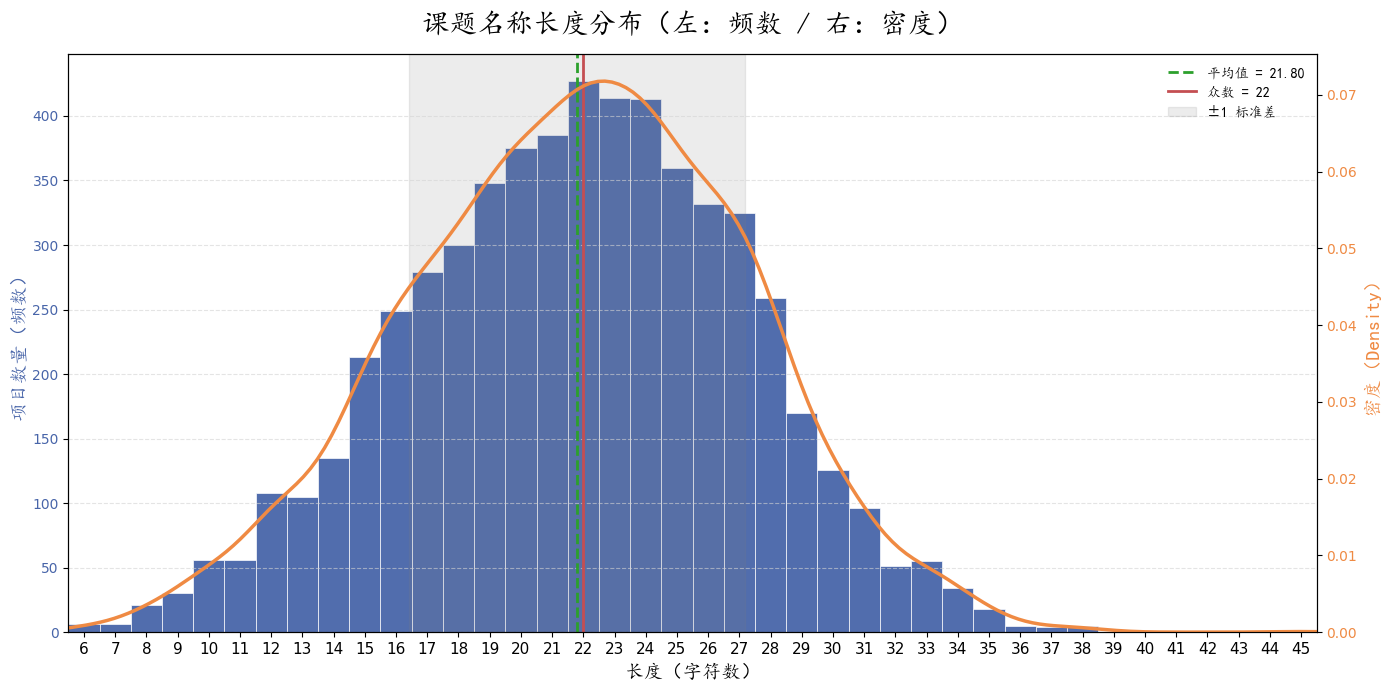

In [1]:
# --- 1. 导入库 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os, sys

# --- 2. 路径与字体 ---
data_file = '/kaggle/input/nssfc-2025/nssfc-fenci.csv'
font_path_chinese = '/kaggle/input/nssfc-2025/simkai.ttf'
font_path_english = '/kaggle/input/nssfc-2025/times.ttf'

# 加载字体
if os.path.exists(font_path_chinese):
    fm.fontManager.addfont(font_path_chinese)
    ch_font = fm.FontProperties(fname=font_path_chinese)
else:
    ch_font = fm.FontProperties()
if os.path.exists(font_path_english):
    fm.fontManager.addfont(font_path_english)
    en_font = fm.FontProperties()
plt.rcParams['axes.unicode_minus'] = False

# --- 3. 加载数据 ---
try:
    df = pd.read_csv(data_file)
except UnicodeDecodeError:
    df = pd.read_csv(data_file, encoding='utf-8-sig')

if '课题名称' not in df.columns:
    print("❌ 缺少列 '课题名称'")
    sys.exit()

# --- 4. 计算长度与统计量 ---
df['课题名称'] = df['课题名称'].astype(str)
df['课题名称长度'] = df['课题名称'].str.len()
lengths = df['课题名称长度']

mean_val = lengths.mean()
std_val = lengths.std()
min_val, max_val = lengths.min(), lengths.max()
vc = lengths.value_counts()
mode_freq = vc.max()
mode_vals = vc[vc == mode_freq].index.tolist()

# --- 5. 打印统计摘要 ---
print("\n" + "=" * 70)
print("📊 『课题名称长度』统计摘要（含众数）")
summary = lengths.describe()
summary_df = summary.to_frame('全部项目')
print(summary_df.to_string(float_format='{:.2f}'.format))

print(f"\n众数（出现频数 = {mode_freq}）：{mode_vals}")
print(f"平均值（Mean） = {mean_val:.2f}")
print(f"标准差（Std） = {std_val:.2f}")
print(f"最小值（Min） = {min_val}")
print(f"最大值（Max） = {max_val}")
print("=" * 70 + "\n")

# --- 6. 绘图（双轴 + 学术配色 + 标注）---
print("🎨 正在绘制『频数+密度』双轴图（学术风格 + 标注）...")

fig, ax1 = plt.subplots(figsize=(14, 7))
bins = np.arange(lengths.min() - 0.5, lengths.max() + 1.5, 1)

# 学术配色
color_hist = '#4865A9'   # 柔和蓝
color_kde  = '#EF8A43'   # 琥珀橙
color_mean = '#2CA02C'   # 平均值 绿
color_mode = '#C44E52'   # 众数 红



# 左轴：频数柱
ax1.hist(
    lengths,
    bins=bins,
    color=color_hist,
    edgecolor='white',
    linewidth=0.5,
    alpha=0.95
)
ax1.set_xlabel('长度（字符数）', fontproperties=ch_font, fontsize=14)
ax1.set_ylabel('项目数量（频数）', fontproperties=ch_font, fontsize=14, color=color_hist)
ax1.tick_params(axis='y', labelcolor=color_hist)
ax1.set_xticks(np.arange(lengths.min(), lengths.max() + 1, 1))
ax1.set_xlim(lengths.min() - 0.5, lengths.max() + 0.5)
plt.setp(ax1.get_xticklabels(), fontproperties=en_font, fontsize=11)

# 右轴：密度曲线
ax2 = ax1.twinx()
sns.kdeplot(lengths, ax=ax2, color=color_kde, linewidth=2.5)
ax2.set_ylabel('密度（Density）', fontproperties=ch_font, fontsize=14, color=color_kde)
ax2.tick_params(axis='y', labelcolor=color_kde)

# 平均值、众数、标准差标注
ax1.axvline(mean_val, color=color_mean, linestyle='--', linewidth=2, label=f'平均值 = {mean_val:.2f}')
for mv in mode_vals:
    ax1.axvline(mv, color=color_mode, linestyle='-', linewidth=2, label=f'众数 = {mv}')
ax1.axvspan(mean_val - std_val, mean_val + std_val, color='gray', alpha=0.15, label='±1 标准差')

# 标题、图例与网格
ax1.set_title('课题名称长度分布（左：频数 / 右：密度）', fontproperties=ch_font, fontsize=20, pad=15)
ax1.grid(axis='y', linestyle='--', color='#D3D3D3', alpha=0.6)

# 图例（去重处理）
handles, labels = ax1.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax1.legend(unique.values(), unique.keys(), prop=ch_font, fontsize=12, loc='upper right', frameon=False)

# 背景
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')
fig.tight_layout()

# 保存图
out_png = 'title_length_stats.png'
fig.savefig(out_png, dpi=300, bbox_inches='tight')
print(f"✅ 图表已保存：{out_png}（位于 /kaggle/working/）")

plt.show()
plt.close(fig)


In [2]:
# 我要绘制的类别包括{全部项目}、{管理学}、{信息资源管理与文献学}、{应用经济学}、{理论经济学}、{新闻学与传播学}


正在生成 '项目标题长度对比 (KDE)' 图...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

图表已成功保存为: comparison_length_kde_multi_subjects.png (位于 /kaggle/working/ 目录)
正在显示图表: 项目标题长度对比 (KDE)


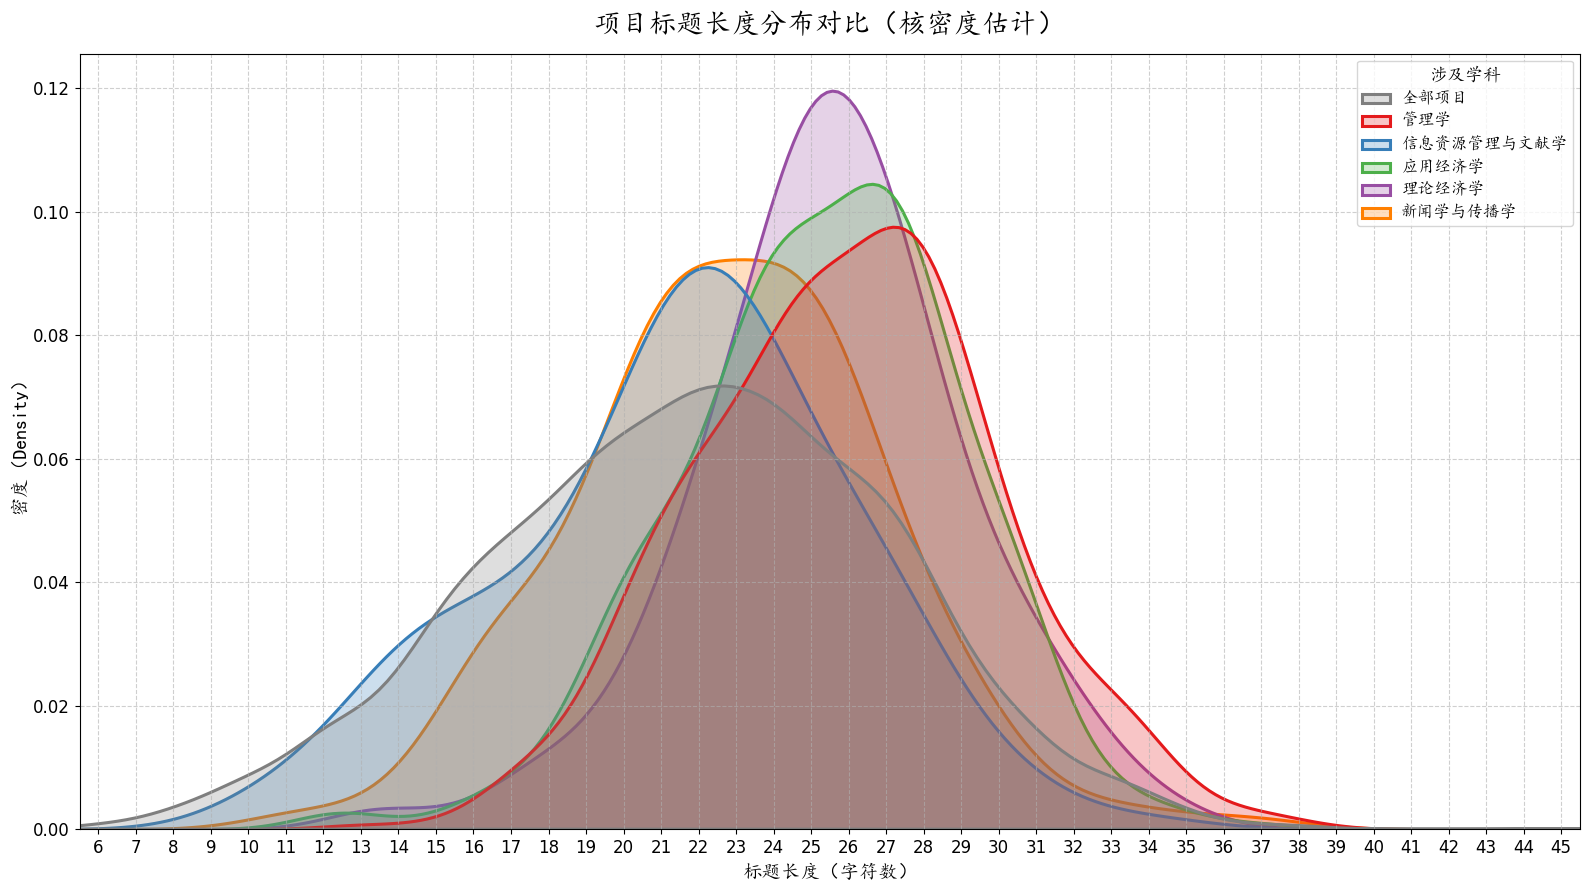


任务完成。


In [6]:
# --- 6. 任务2&3：对比多个学科与“全部项目”的标题长度（KDE） ---
print("\n正在生成 '项目标题长度对比 (KDE)' 图...")

# 1) 前置检查与准备
need_cols = {'涉及学科', '课题名称'}
if not need_cols.issubset(set(df.columns)):
    missing = need_cols - set(df.columns)
    print(f"❌ 错误：缺少必要列：{missing}")
    sys.exit()

# 统一计算长度列（若之前已计算可跳过）
df['课题名称'] = df['课题名称'].astype(str)
df['课题名称长度'] = df['课题名称'].str.len()

# 2) 目标学科清单（顺序即图例顺序）
target_subjects = [
    '管理学',
    '信息资源管理与文献学',
    '应用经济学',
    '理论经济学',
    '新闻学与传播学'
]

# 3) 组装绘图数据：每个学科 + 全部项目
frames = []

# 全部项目
len_all = df['课题名称长度'].dropna().astype(int)
df_all_cat = len_all.to_frame(name='标题长度'); df_all_cat['类别'] = '全部项目'
frames.append(df_all_cat)

# 各目标学科
for subj in target_subjects:
    sub_len = df.loc[df['涉及学科'] == subj, '课题名称长度'].dropna().astype(int)
    if sub_len.empty:
        print(f"⚠️ 提示：学科『{subj}』在数据中为空，已跳过。")
        continue
    tmp = sub_len.to_frame(name='标题长度'); tmp['类别'] = subj
    frames.append(tmp)

plot_df = pd.concat(frames, ignore_index=True)

# 4) 学术配色（与前面风格一致，区分度高且不刺眼）
palette_order = ['全部项目'] + [s for s in target_subjects if s in plot_df['类别'].unique()]

palette_map = {
    '全部项目': '#7F7F7F',      # 灰
    '管理学': '#E41A1C',        # 红
    '信息资源管理与文献学': '#377EB8', # 蓝
    '应用经济学': '#4DAF4A',     # 绿
    '理论经济学': '#984EA3',     # 紫
    '新闻学与传播学': '#FF7F00'  # 橙
}

# 5) 绘图（KDE）
fig, ax = plt.subplots(figsize=(16, 9))

sns.kdeplot(
    data=plot_df,
    x='标题长度',
    hue='类别',
    hue_order=palette_order,
    palette=[palette_map[c] for c in palette_order],
    fill=True,           # 学术风：线条为主，避免大面积填充
    common_norm=False,    # 各组独立归一化，便于比较形状
    bw_adjust=1.0,        # 平滑度，可按需要微调
    linewidth=2.2,
    ax=ax
)

# 标题与轴标签
ax.set_title('项目标题长度分布对比（核密度估计）', fontproperties=ch_font, fontsize=20, pad=15)
ax.set_xlabel('标题长度（字符数）', fontproperties=ch_font, fontsize=14)
ax.set_ylabel('密度（Density）', fontproperties=ch_font, fontsize=14)

# 刻度与网格
plt.setp(ax.get_xticklabels(), fontproperties=en_font, fontsize=12)
plt.setp(ax.get_yticklabels(), fontproperties=en_font, fontsize=12)
ax.grid(axis='both', linestyle='--', alpha=0.6)

# 图例（中文字体）
legend = ax.get_legend()
if legend is not None:
    legend.set_title('涉及学科', prop={'size': 13, 'family': ch_font.get_name()})
    for txt in legend.get_texts():
        txt.set_fontproperties(ch_font)
        txt.set_fontsize(12)

# x 轴范围与刻度（整数刻度更直观）
xmin, xmax = plot_df['标题长度'].min(), plot_df['标题长度'].max()
ax.set_xlim(xmin - 0.5, xmax + 0.5)
ax.set_xticks(np.arange(xmin, xmax + 1, 1))

fig.tight_layout()

# 保存
output_filename_2 = 'comparison_length_kde_multi_subjects.png'
try:
    fig.savefig(output_filename_2, dpi=300, bbox_inches='tight')
    print(f"图表已成功保存为: {output_filename_2} (位于 /kaggle/working/ 目录)")
except Exception as e:
    print(f"保存图表 '{output_filename_2}' 时出错: {e}")

# 显示
try:
    print("正在显示图表: 项目标题长度对比 (KDE)")
    plt.show()
except Exception as e:
    print(f"显示图表时出错: {e}")

plt.close(fig)
print("\n任务完成。")


In [7]:
# --- 7. 指标汇总：count / mean / median / mode / std / IQR（含“全部项目”） ---
print("\n正在计算各学科指标（count / mean / median / mode / std / IQR）...")

def _mode_val(s: pd.Series):
    if s.empty: 
        return np.nan
    vc = s.value_counts()
    return vc.index[0]  # 多众数时取出现频数最高且最先出现的一个

# 组装“全部项目” + 各学科
cats = ['全部项目'] + [s for s in target_subjects if s in df['涉及学科'].unique()]
rows = []
for c in cats:
    if c == '全部项目':
        s = df['课题名称长度'].dropna().astype(int)
    else:
        s = df.loc[df['涉及学科'] == c, '课题名称长度'].dropna().astype(int)
    if s.empty:
        continue
    count  = int(s.count())
    mean   = s.mean()
    median = s.median()
    mode   = _mode_val(s)
    std    = s.std()
    iqr    = s.quantile(0.75) - s.quantile(0.25)
    rows.append([c, count, mean, median, mode, std, iqr])

stats_df = pd.DataFrame(rows, columns=['涉及学科', '样本数', '平均值', '中位数', '众数', '标准差', '四分位距（IQR）'])

# 数字格式化（学术风保留两位小数，众数/样本数保持整数）
fmt_df = stats_df.copy()
for col in ['平均值', '中位数', '标准差', '四分位距（IQR）']:
    fmt_df[col] = fmt_df[col].astype(float).round(2)
fmt_df['样本数'] = fmt_df['样本数'].astype(int)
fmt_df['众数'] = fmt_df['众数'].astype(int)

# --- 7.1 控制台打印 Markdown 源代码（表格整体居中 + 单元格居中） ---
def df_to_centered_markdown(df: pd.DataFrame) -> str:
    headers = df.columns.tolist()
    md = []
    md.append('<div align="center">')
    md.append('')
    md.append('| ' + ' | '.join(headers) + ' |')
    md.append('| ' + ' | '.join([':---:' for _ in headers]) + ' |')
    for _, r in df.iterrows():
        md.append('| ' + ' | '.join(str(x) for x in r.tolist()) + ' |')
    md.append('')
    md.append('</div>')
    return '\n'.join(md)

md_text = df_to_centered_markdown(fmt_df)
print("\n====== Markdown 表格源代码（可直接复制） ======\n")
print(md_text)
print("\n=============================================\n")

# --- 7.2 保存文件 ---
csv_path = 'length_stats_by_subject.csv'
md_path  = 'length_stats_by_subject.md'
fmt_df.to_csv(csv_path, index=False)
with open(md_path, 'w', encoding='utf-8') as f:
    f.write(md_text + '\n')

print(f"✅ 已保存：{csv_path} / {md_path} （位于 /kaggle/working/）")



正在计算各学科指标（count / mean / median / mode / std / IQR）...

====== Markdown 表格源代码（可直接复制） ======

<div align="center">

| 涉及学科 | 样本数 | 平均值 | 中位数 | 众数 | 标准差 | 四分位距（IQR） |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 全部项目 | 5767 | 21.8 | 22.0 | 22 | 5.37 | 8.0 |
| 管理学 | 590 | 25.95 | 26.0 | 28 | 3.99 | 6.0 |
| 信息资源管理与文献学 | 145 | 21.48 | 22.0 | 22 | 4.59 | 5.0 |
| 应用经济学 | 509 | 25.3 | 26.0 | 27 | 3.75 | 5.0 |
| 理论经济学 | 191 | 25.5 | 26.0 | 25 | 3.61 | 4.5 |
| 新闻学与传播学 | 211 | 22.85 | 23.0 | 21 | 4.13 | 5.0 |

</div>


✅ 已保存：length_stats_by_subject.csv / length_stats_by_subject.md （位于 /kaggle/working/）
